In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os.path
import glob

In [ ]:
# Training Data Filepath
training_data_path = Path('/data/Lung Disease Dataset/train')
train_filepath_list = list(training_data_path.glob(r'**/*.jp*'))
train_class_list = list(map(lambda x : os.path.split(os.path.split(x)[0])[1], train_filepath_list))

# Validation Data Filepath
valdiation_data_path = Path('/data/Lung Disease Dataset/val')
valdiation_filepath_list = list(valdiation_data_path.glob(r'**/*.jp*'))
validation_class_list = list(map(lambda x : os.path.split(os.path.split(x)[0])[1], valdiation_filepath_list))

# Test Data Filepath
test_data_path = Path('/data/Lung Disease Dataset/test')
test_filepath_list = list(test_data_path.glob(r'**/*.jp*'))
test_class_list = list(map(lambda x : os.path.split(os.path.split(x)[0])[1], test_filepath_list))

In [ ]:
final_df = pd.DataFrame(columns = ['filepath', 'class', 'type'])

train_df = [{'filepath': str(filepath), 'class': class_, 'type': 'train'} for filepath, class_, in zip(train_filepath_list, train_class_list)]
test_df = [{'filepath': str(filepath), 'class': class_, 'type': 'test'} for filepath, class_, in zip(test_filepath_list, test_class_list)]
valid_df = [{'filepath': str(filepath), 'class': class_, 'type': 'valid'} for filepath, class_, in zip(valdiation_filepath_list, validation_class_list)]

final_df = pd.concat([final_df, pd.DataFrame(train_df),pd.DataFrame(valid_df), pd.DataFrame(test_df) ])


In [ ]:
final_df.head()

,filepath,class,type
0,/content/data/Lung Disease Dataset/train/Tuber...,Tuberculosis,train
1,/content/data/Lung Disease Dataset/train/Tuber...,Tuberculosis,train
2,/content/data/Lung Disease Dataset/train/Tuber...,Tuberculosis,train
3,/content/data/Lung Disease Dataset/train/Tuber...,Tuberculosis,train
4,/content/data/Lung Disease Dataset/train/Tuber...,Tuberculosis,train


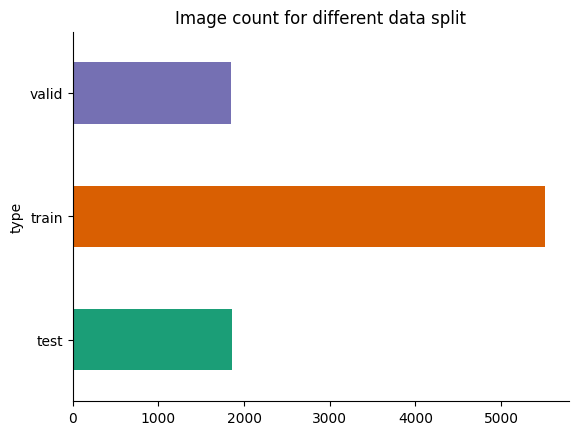

In [ ]:
final_df.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Image count for different data split')
plt.gca().spines[['top', 'right',]].set_visible(False)

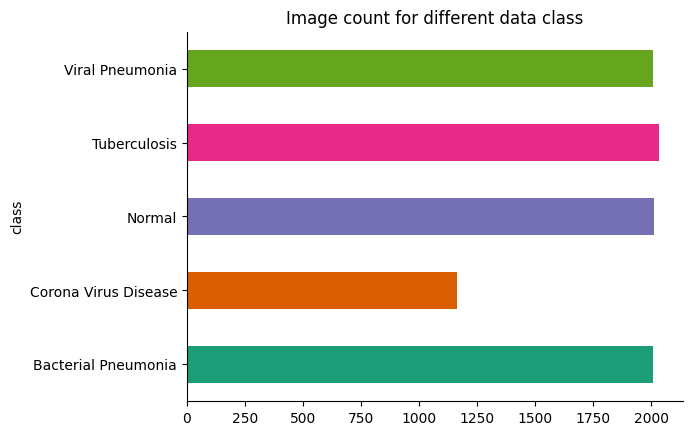

In [ ]:
final_df.groupby('class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Image count for different data class')
plt.gca().spines[['top', 'right',]].set_visible(False)

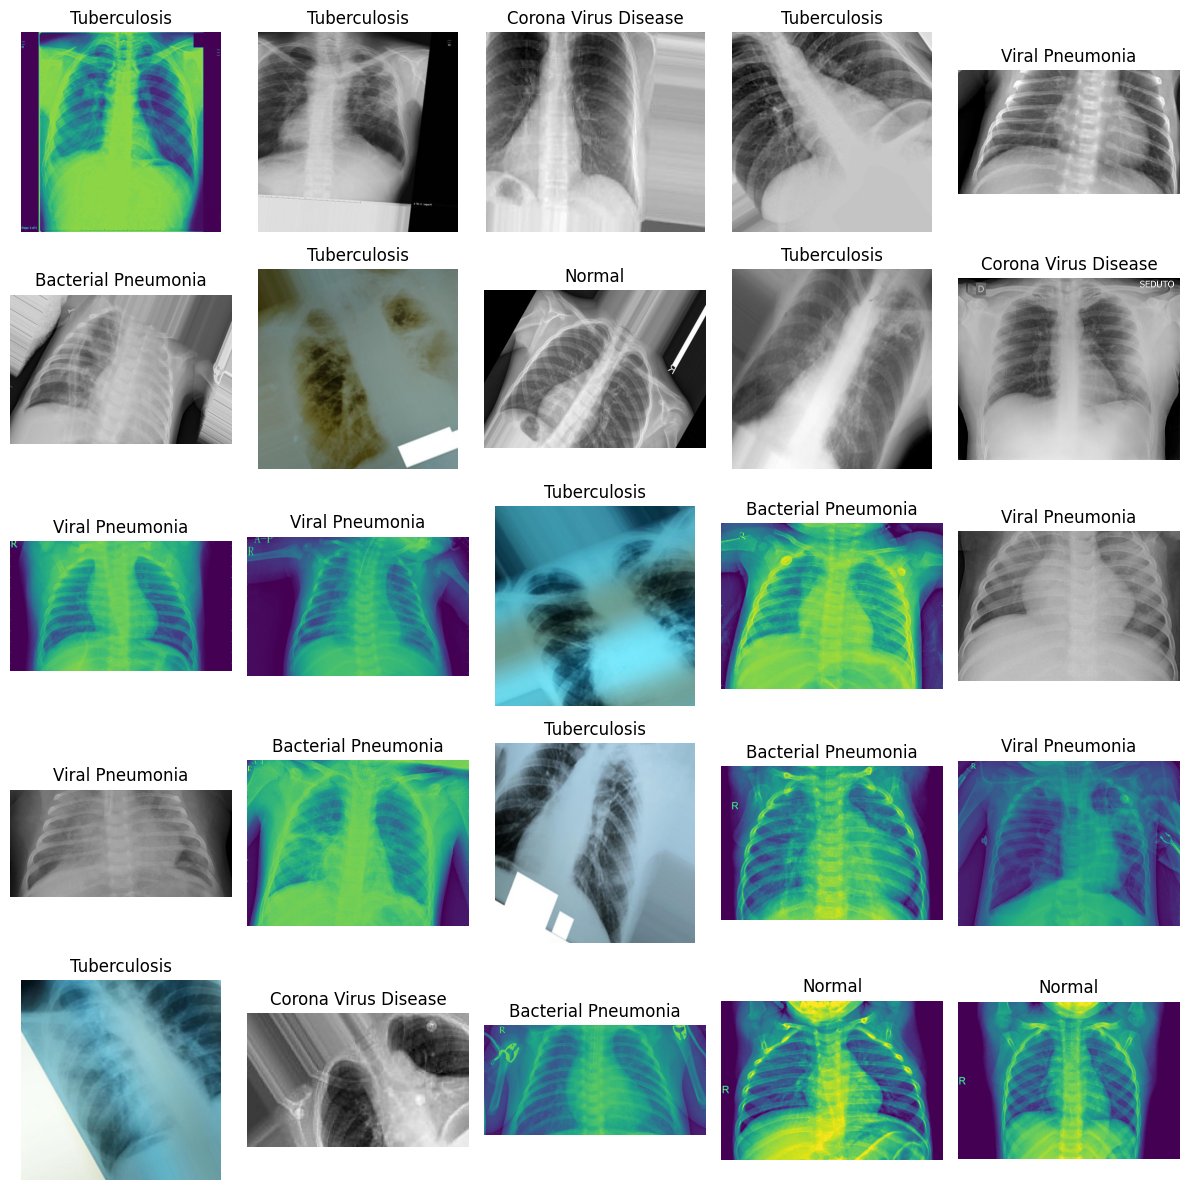

In [ ]:
sample_df = final_df.sample(5 * 5, random_state=42)

# Create the figure and axes
fig, axes = plt.subplots(5, 5, figsize=(12, 12))

# Iterate over the axes and plot the images
for ax, img_path, title in zip(axes.flat, sample_df['filepath'], sample_df['class']):
    img = plt.imread(img_path)
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')

# Show the figure
fig.tight_layout()
plt.show()

In [ ]:
train_gen_instance = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1./255,
                             width_shift_range=0.2 ,
                             height_shift_range=0.2 ,
                             zoom_range=0.2)

val_gen_instance = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

test_gen_instance = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)


In [ ]:
# Training Data
train_df = final_df[final_df['type']== 'train'].drop('type', axis = 1)
train_images = train_gen_instance.flow_from_dataframe(dataframe = train_df,
                                           x_col = 'filepath',
                                           y_col = 'class',
                                           target_size = (224,224),
                                           batch_size = 32,
                                          color_mode="grayscale",
                                          class_mode='categorical')


# Validation Data
valid_df = final_df[final_df['type']== 'valid'].drop('type', axis = 1)
valid_images = val_gen_instance.flow_from_dataframe(dataframe = valid_df,
                                           x_col = 'filepath',
                                           y_col = 'class',
                                           target_size = (224,224),
                                           batch_size = 32,
                                          color_mode="grayscale",
                                          class_mode='categorical')

# Testing Data
test_df = final_df[final_df['type']== 'test'].drop('type', axis = 1)

test_images = test_gen_instance.flow_from_dataframe(dataframe = test_df,
                                           x_col = 'filepath',
                                           y_col = 'class',
                                           target_size = (224,224),
                                           batch_size = 32,
                                          color_mode="grayscale",
                                          class_mode='categorical')

Found 5515 validated image filenames belonging to 5 classes.
Found 1849 validated image filenames belonging to 5 classes.
Found 1863 validated image filenames belonging to 5 classes.
